In [23]:
from tensorflow.python.summary.summary_iterator import summary_iterator
import pandas as pd
import matplotlib.pyplot as plt
def get_eval_returns(paths, run_names, tag):
    returns = []
    for path in paths:
        return_temp = []
        for e in summary_iterator(path):
            for v in e.summary.value:
                if v.tag == tag:
                    return_temp.append(v.simple_value)
        returns.append(return_temp)
    df = pd.DataFrame(returns).T
    df.columns = run_names
    return df.reset_index(drop=True)
                

# Question 1

In [24]:
import os
root = os.path.join(os.getcwd(), "run_logs")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if "q1" in path]

In [25]:
len(files)

1

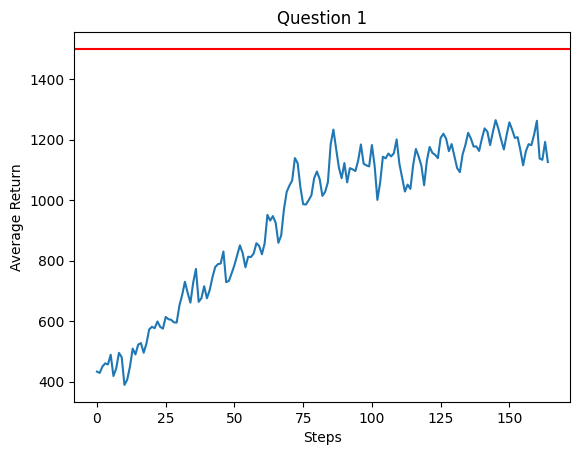

In [31]:
run_names = ["q1"]
exp1 = get_eval_returns(files, run_names, "Train_AverageReturn")
plt.plot(exp1.loc[:, "q1"])
plt.axhline(1500, color="red")
plt.ylabel("Average Return")
plt.xlabel("Steps")
plt.title("Question 1");
#plt.savefig("imgs/Exp4_gs.png", dpi=600, bbox_inches="tight")

# Question 2

In [16]:
import os
root = os.path.join(os.getcwd(), "run_logs")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if "q2" in path]
len(files)

6

Text(0.5, 1.0, 'Question 2')

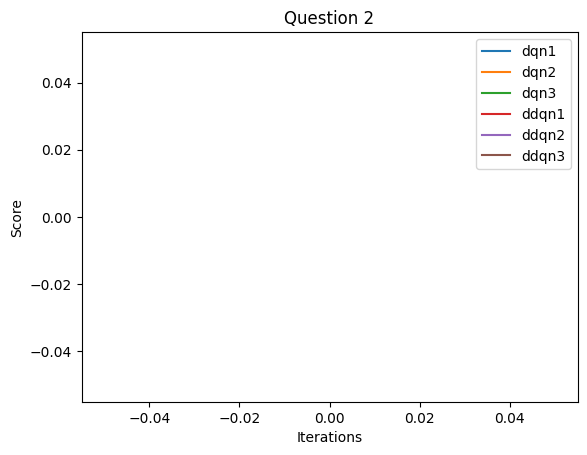

In [9]:
run_names = ["dqn1","dqn2", "dqn3", "ddqn1", "ddqn2", "ddqn3"]
exp2 = get_eval_returns(files, run_names)
for col in exp2.columns:
    plt.plot(exp2.loc[:, col], label=col)
plt.legend()
plt.ylabel("Score")
plt.xlabel("Iterations")
plt.title("Question 2")
#plt.savefig("imgs/q2.png", dpi=600, bbox_inches="tight")

# Experiment 5

In [17]:
import os
root = os.path.join(os.getcwd(), "run_logs")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if "q5" in path]

In [18]:
len(files)

5

In [19]:
files

['c:\\Users\\Bruger\\OneDrive - Danmarks Tekniske Universitet\\Kandidat - Business Analytics\\4. Semester E22 - UC Berkeley\\CS 285. Deep Reinforcement Learning\\Homework\\HW2\\run_logs\\q5_b2000_r0.001_lambda0.95_Hopper-v4_27-09-2022_17-15-46\\events.out.tfevents.1664298946.3a21167a37c1',
 'c:\\Users\\Bruger\\OneDrive - Danmarks Tekniske Universitet\\Kandidat - Business Analytics\\4. Semester E22 - UC Berkeley\\CS 285. Deep Reinforcement Learning\\Homework\\HW2\\run_logs\\q5_b2000_r0.001_lambda0.98_Hopper-v4_27-09-2022_17-27-53\\events.out.tfevents.1664299673.3a21167a37c1',
 'c:\\Users\\Bruger\\OneDrive - Danmarks Tekniske Universitet\\Kandidat - Business Analytics\\4. Semester E22 - UC Berkeley\\CS 285. Deep Reinforcement Learning\\Homework\\HW2\\run_logs\\q5_b2000_r0.001_lambda0.99_Hopper-v4_27-09-2022_17-40-22\\events.out.tfevents.1664300422.3a21167a37c1',
 'c:\\Users\\Bruger\\OneDrive - Danmarks Tekniske Universitet\\Kandidat - Business Analytics\\4. Semester E22 - UC Berkeley\\CS

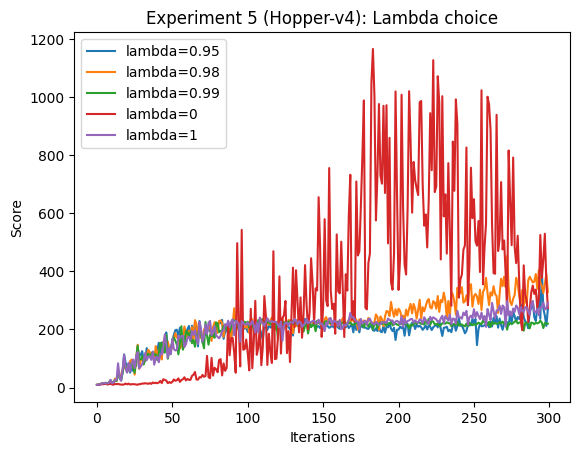

In [20]:
lamb = [0.95, 0.98, 0.99, 0, 1]
run_names = ["lambda={lam}".format(lam=l) for l in lamb]
exp5 = get_eval_returns(files, run_names)
for col in exp5.columns:
    plt.plot(exp5.loc[:, col], label=col)
plt.legend()
plt.ylabel("Score")
plt.xlabel("Iterations")
plt.title("Experiment 5 (Hopper-v4): Lambda choice")
plt.savefig("imgs/Exp5.png", dpi=600, bbox_inches="tight")

In [102]:
exp5.mean()

lambda=0       189.341236
lambda=0.95    224.968829
lambda=0.98    189.994817
lambda=0.99    340.797174
lambda=1       201.115180
dtype: float64